# Importing Libraries & Data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Lasso, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



import warnings
warnings.filterwarnings('ignore')

In [30]:
data = pd.read_csv('https://general-assembly-project-5.s3.amazonaws.com/rj_master.csv')

In [31]:
data.head()

,cd_geocodi,nm_subdist,nm_distrit,nm_municip,nm_micro,nm_meso,geog_orig_area,favela_present,favela_area_squaremeters,sao_paulo_apartment_count_listings,...,brazil_store_count_listings,brazil_store_near_fid,brazil_store_near_dist,brazil_store_near_angle,brazil_store_near_price,brazil_ph_near_fid,brazil_ph_near_dist,brazil_ph_near_angle,brazil_ph_near_price,population_estimate
0,330045605010040,AREIA BRANCA,BELFORD ROXO,BELFORD ROXO,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,29599.087844,0.0,0.0,0.0,...,0.0,1583,4438.758051,-86.631615,900.0,28,230806.163119,-121.810231,2000.0,422.559540
1,330045605010041,AREIA BRANCA,BELFORD ROXO,BELFORD ROXO,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,64936.339075,0.0,0.0,0.0,...,0.0,1583,4434.372601,-83.619778,900.0,28,230663.417081,-121.764362,2000.0,900.746216
2,330045605010042,AREIA BRANCA,BELFORD ROXO,BELFORD ROXO,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,55826.550455,0.0,0.0,0.0,...,0.0,1583,4150.241822,-89.857207,900.0,28,230584.459749,-121.833191,2000.0,796.985535
3,330045605010043,AREIA BRANCA,BELFORD ROXO,BELFORD ROXO,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,60991.680777,0.0,0.0,0.0,...,0.0,1583,4199.241757,-85.716529,900.0,28,230563.978085,-121.789641,2000.0,864.368515
4,330045605010044,AREIA BRANCA,BELFORD ROXO,BELFORD ROXO,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,43686.184381,0.0,0.0,0.0,...,0.0,1583,4165.779279,-82.717356,900.0,28,230411.326726,-121.791830,2000.0,594.177948


In [32]:
data.describe()

,cd_geocodi,geog_orig_area,favela_present,favela_area_squaremeters,sao_paulo_apartment_count_listings,sao_paulo_apartment_near_fid,sao_paulo_apartment_near_dist,sao_paulo_apartment_near_angle,sao_paulo_apartment_near_price,brazil_apartment_count_listings,...,brazil_store_count_listings,brazil_store_near_fid,brazil_store_near_dist,brazil_store_near_angle,brazil_store_near_price,brazil_ph_near_fid,brazil_ph_near_dist,brazil_ph_near_angle,brazil_ph_near_price,population_estimate
count,1.644700e+04,1.644700e+04,16447.000000,16447.000000,16447.000000,16447.0,16447.000000,16447.000000,16447.0,16447.00000,...,16447.000000,16447.000000,16447.000000,16447.000000,16447.000000,16447.0,16447.000000,16447.000000,16447.0,16447.000000
mean,3.304026e+14,2.054110e+05,0.293975,2821.785410,0.000061,8552.0,16702.150540,26.532809,285700.0,0.09108,...,0.025901,4611.088588,4931.099071,11.657478,20915.035082,28.0,229467.590600,-118.952344,2000.0,733.467717
std,1.140360e+11,1.754795e+06,0.455594,8539.297010,0.007798,0.0,9205.680236,68.993624,0.0,1.05554,...,0.608274,2189.061349,4487.950872,114.529473,29922.362003,0.0,12298.381777,2.768878,0.0,1060.915062
min,3.300456e+14,5.080360e+02,0.000000,0.000000,0.000000,8552.0,0.000000,-179.987679,285700.0,0.00000,...,0.000000,569.000000,0.000000,-179.998698,450.000000,28.0,187818.094756,-128.637367,2000.0,0.000000
25%,3.304144e+14,2.105167e+04,0.000000,0.000000,0.000000,8552.0,9830.996835,-23.171196,285700.0,0.00000,...,0.000000,2560.000000,1368.267758,-100.588245,900.000000,28.0,223361.974298,-120.886077,2000.0,282.275620
50%,3.304557e+14,4.282664e+04,0.000000,0.000000,0.000000,8552.0,15567.533141,30.261901,285700.0,0.00000,...,0.000000,5301.000000,3858.817435,27.229506,3500.000000,28.0,232036.602285,-119.051469,2000.0,514.792870
75%,3.304557e+14,7.856990e+04,1.000000,182.392845,0.000000,8552.0,22063.213636,72.171783,285700.0,0.00000,...,0.000000,6411.000000,7229.182560,115.511474,28000.000000,28.0,238048.293919,-116.727531,2000.0,815.366154
max,3.305554e+14,1.398751e+08,1.000000,115112.113927,1.000000,8552.0,44241.516063,179.904882,285700.0,46.00000,...,31.000000,7391.000000,25938.224510,179.994326,76000.000000,28.0,256797.824491,-111.777611,2000.0,17264.407416


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16447 entries, 0 to 16446
Data columns (total 34 columns):
cd_geocodi                            16447 non-null int64
nm_subdist                            16447 non-null object
nm_distrit                            16447 non-null object
nm_municip                            16447 non-null object
nm_micro                              16447 non-null object
nm_meso                               16447 non-null object
geog_orig_area                        16447 non-null float64
favela_present                        16447 non-null float64
favela_area_squaremeters              16447 non-null float64
sao_paulo_apartment_count_listings    16447 non-null float64
sao_paulo_apartment_near_fid          16447 non-null int64
sao_paulo_apartment_near_dist         16447 non-null float64
sao_paulo_apartment_near_angle        16447 non-null float64
sao_paulo_apartment_near_price        16447 non-null int64
brazil_apartment_count_listings       16447 non-

In [34]:
data.shape

(16447, 34)

In [35]:
X_cols = ['sao_paulo_apartment_count_listings', 'sao_paulo_apartment_near_dist', 'sao_paulo_apartment_near_angle',
         'sao_paulo_apartment_near_price', 'brazil_apartment_count_listings', 'brazil_apartment_near_dist', 
         'brazil_apartment_near_angle', 'brazil_apartment_near_price', 'brazil_house_count_listings', 
         'brazil_house_near_dist', 'brazil_house_near_angle', 'brazil_house_near_price', 
         'brazil_store_count_listings', 'brazil_store_near_dist', 'brazil_store_near_angle',
         'brazil_store_near_price', 'brazil_ph_near_dist', 'brazil_ph_near_angle',
         'brazil_ph_near_price', 'population_estimate',
         ]

X = data[X_cols]
y = data['favela_present']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19)

Picking out the numeric columns that might help with determining the presence of a informal settlements from the real estate and population data we were able to find.

# Modeling

## Base Model

In [36]:
data['favela_present'].value_counts(normalize = True)

0.0    0.706025
1.0    0.293975
Name: favela_present, dtype: float64

A base model that predicts no favelas present in each census grid would be about 77.8% accurate. Any models we make should hope to perform better than that.

## Logistic Regression Model

Starting off with a scaler and logistic regression model.

In [37]:
pipe = Pipeline(steps = [
    ('sc', StandardScaler()),
    ('lr', LogisticRegression())
])

params = {
    'lr__penalty'        : ['l1', 'l2'],
    'lr__C'              : [0.1, 0.3, 0.5, 0.7, 1.0],
    
}

gs_lr = GridSearchCV(pipe,
                 param_grid = params,
                 cv = 5,
                 scoring = 'accuracy')

gs_lr.fit(X_train, y_train);

In [38]:
gs_lr.best_estimator_

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [39]:
gs_lr.best_score_

0.7404134576408593

In [40]:
gs_lr.score(X_test, y_test)

0.7295719844357976

This model performs about as well as the base model, but could definitely perform a lot better. Moving on to a K-Nearest Neighbors model to see how well it performs.

In [41]:
roc_auc_score(y_test, gs_lr.predict_proba(X_test)[:, 1])

0.7757749479650384

## KNN Model

In [42]:
pipe = Pipeline(steps = [
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

params = {
    'knn__n_neighbors'    : [3, 5, 7, 9],
    'knn__metric'         : ['minkowski', 'euclidean', 'manhattan']
    
}

gs_knn = GridSearchCV(pipe,
                 param_grid = params,
                 cv = 5,
                 scoring = 'accuracy')

gs_knn.fit(X_train, y_train);

In [43]:
gs_knn.best_estimator_

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

In [44]:
gs_knn.best_score_

0.8780705310093231

In [45]:
gs_knn.score(X_test, y_test)

0.8842412451361867

This model is already better than the base model. There is still some room for improvement, however. Next step is to try a Decision Tree model.

In [46]:
roc_auc_score(y_test, gs_knn.predict_proba(X_test)[:, 1])

0.9241394792795791

## Decision Tree Model

In [47]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
tree.score(X_train, y_train)

1.0

In [49]:
tree.score(X_test, y_test)

0.8613813229571985

In [50]:
cross_val_score(tree, X_train, y_train, cv = 5).mean()

0.867450344548034

The Desicion Tree doesn't perform as well as K-Nearest Neighbors at the moment. Let's move onto Random Forests, to see how that works.

In [51]:
roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])

0.840519058981388

## Bagging Classifier Model

In [52]:
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [53]:
bagging.score(X_train, y_train)

0.9944872314552088

In [54]:
cross_val_score(bagging, X_train, y_train, cv = 5).mean()

0.8882853668423186

In [55]:
bagging.score(X_test, y_test)

0.8891050583657587

In [56]:
roc_auc_score(y_test, bagging.predict_proba(X_test)[:, 1])

0.9413172685360447

## Random Forest Model

In [57]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
rand_forest.score(X_train, y_train)

1.0

In [59]:
cross_val_score(rand_forest, X_train, y_train, cv = 5).mean()

0.9087150385083096

In [60]:
rand_forest.score(X_test, y_test)

0.9051556420233463

This model works better than the KNN model, but there is still a lot of room for improvement. Let's increase the randomness of the model and try to reduce the variance with an Extra Trees model.

In [61]:
roc_auc_score(y_test, rand_forest.predict_proba(X_test)[:, 1])

0.9659238192641317

## Extra Trees Model

In [62]:
extra_trees = ExtraTreesClassifier(n_estimators = 200)
extra_trees.fit(X_train, y_train)
extra_trees.score(X_train, y_train)

1.0

In [63]:
cross_val_score(extra_trees, X_train, y_train, cv = 5).mean()

0.912363194162951

In [64]:
extra_trees.score(X_test, y_test)

0.91318093385214

That's an even better model, but we can still improve a lot. Let's try another boosting model like AdaBoost to see how well it performs.

In [65]:
roc_auc_score(y_test, extra_trees.predict_proba(X_test)[:, 1])

0.972280549861724

## AdaBoost Model

In [66]:
ada = AdaBoostClassifier(n_estimators = 200)
ada.fit(X_train, y_train)
ada.score(X_train, y_train)

0.8449128496149169

In [67]:
cross_val_score(ada, X_train, y_train, cv = 5).mean()

0.823915687069315

In [68]:
ada.score(X_test, y_test)

0.8212548638132295

This model is worse than most of the previous models, the Extra Trees model is still the best option for the moment. Let's try moving on to a Voting Classifier to see how well it performs.

In [69]:
roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1])

0.8946364250192086

## Gradient Boost Model

In [70]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)
grad_boost.score(X_train, y_train)

0.8513173895419538

In [71]:
cross_val_score(grad_boost, X_train, y_train, cv = 5).mean()

0.8369679773003649

In [72]:
grad_boost.score(X_test, y_test)

0.8263618677042801

In [73]:
roc_auc_score(y_test, grad_boost.predict_proba(X_test)[:, 1])

0.9006733716384235

This model is slightly better than the AdaBoost model, but still not as good as the Extra Trees model. Let's try a Voting Classifier with the best performing models next.

## Voting Classifier Model

In [74]:
knn_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])



vote = VotingClassifier([
    ('x_tree', ExtraTreesClassifier()),
    ('rand_forest', RandomForestClassifier()),
    ('knn_pipe', knn_pipe),
], voting = 'soft')
vote_params = {
    'x_tree__max_depth': [None, 4],
    'rand_forest__max_depth': [3, 4],
    'knn_pipe__knn__n_neighbors': [3, 5, 7],

}
gs_vc = GridSearchCV(vote, 
                     param_grid = vote_params, 
                     cv = 5,
                     n_jobs = -2,
                     scoring = 'accuracy')
gs_vc.fit(X_train, y_train)
print(gs_vc.best_score_) # cross val score
gs_vc.best_params_

0.9002837454398055


{'knn_pipe__knn__n_neighbors': 5,
 'rand_forest__max_depth': 4,
 'x_tree__max_depth': None}

In [75]:
gs_vc.score(X_test, y_test)

0.9034533073929961

In [76]:
roc_auc_score(y_test, gs_vc.predict_proba(X_test)[:, 1])

0.9610563478053908

In [77]:
feats = extra_trees.feature_importances_

In [78]:
keys = X_test.keys()

In [79]:
feat_import = pd.DataFrame(list(zip(keys, feats)), columns = ['feature', 'importance'])

In [80]:
feat_import = feat_import.sort_values(by = 'importance', ascending = False)

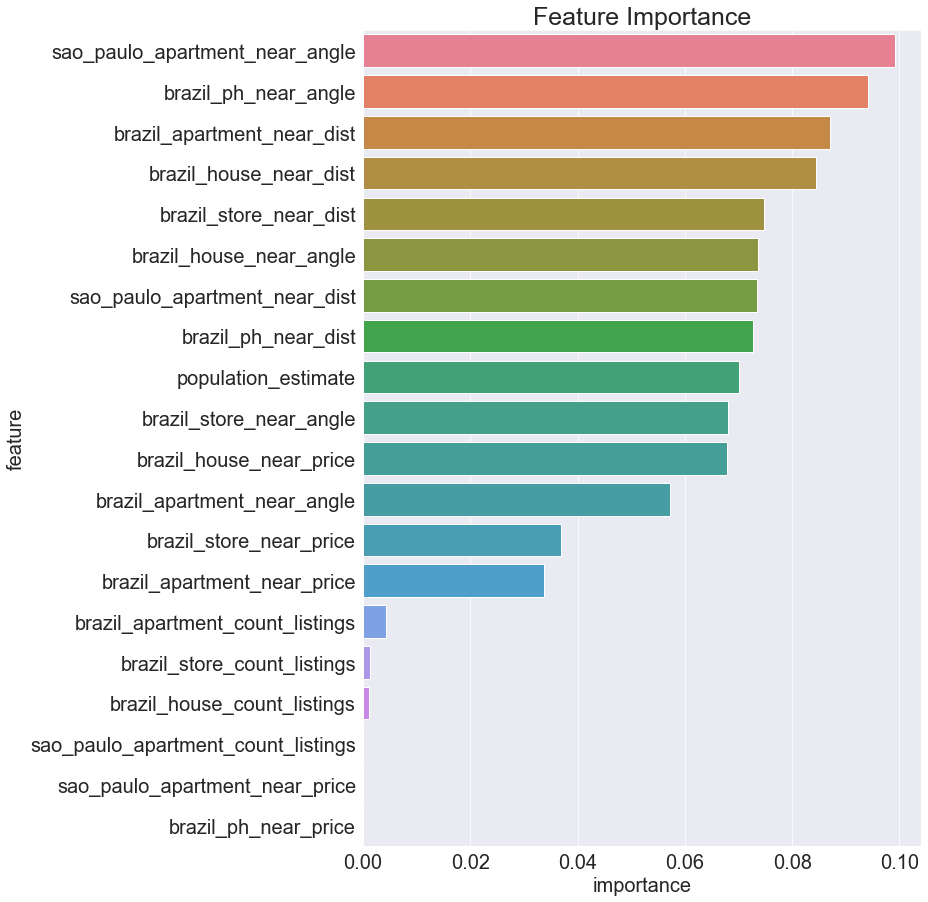

In [81]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance',fontsize=25)
sns.set_style("darkgrid")
sns.barplot(data= feat_import,
            x='importance',y='feature',orient='h', palette="husl")
plt.xlabel('importance',fontsize=20)
plt.ylabel('feature',fontsize=20)
plt.tick_params(labelsize=20)

In [82]:
# Creating a DataFrame to facilitate plotting.
pred_proba = [i[1] for i in extra_trees.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.972


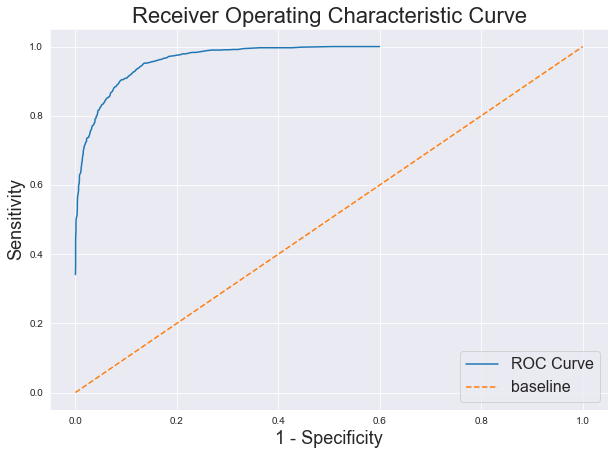

In [83]:
# Creating ROC Scores for baseline and best model.
ns_probs = [0 for _ in range(len(y_test))]
pipe_probs = extra_trees.predict_proba(X_test)
pipe_probs = pipe_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
pipe_auc = roc_auc_score(y_test, pipe_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (pipe_auc))
# Create figure.
plt.figure(figsize = (10,7))
# Create threshold values.
thresholds = np.linspace(0, 1, 200)
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);
